## Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
The steps outlined below are taken to build the appropriate classifier model. 


Steps:
- Download data
- Exploration
- Cleaning
- Feature Engineering
- Modeling



In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("train.csv")

### Exploration

In [4]:
df.shape

(404290, 6)

In [5]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [6]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [7]:
data = df[['is_duplicate','question1', 'question2']]

In [8]:
data.dtypes

is_duplicate     int64
question1       object
question2       object
dtype: object

In [9]:
data.isnull().sum()

is_duplicate    0
question1       1
question2       2
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data['is_duplicate'].value_counts()/data.shape[0]

0    0.630799
1    0.369201
Name: is_duplicate, dtype: float64

In [12]:
data.head(5)

,is_duplicate,question1,question2
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


### Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

In [13]:
import string

def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

data['question1_clean'] = data['question1'].apply(lambda x: remove_punct(x))
data['question2_clean'] = data['question2'].apply(lambda x: remove_punct(x))

data.head()

,is_duplicate,question1,question2,question1_clean,question2_clean
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,What is the story of Kohinoor KohiNoor Diamond,What would happen if the Indian government sto...
2,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,Why am I mentally very lonely How can I solve it,Find the remainder when math2324math is divide...
4,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,Which one dissolve in water quikly sugar salt ...,Which fish would survive in salt water


In [14]:
def tokenize(text):
    tokens = text.split()
    return tokens

data['question1_tokenized'] = data['question1_clean'].apply(lambda x: tokenize(x.lower()))
data['question2_tokenized'] = data['question2_clean'].apply(lambda x: tokenize(x.lower()))


data.head()

,is_duplicate,question1,question2,question1_clean,question2_clean,question1_tokenized,question2_tokenized
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv..."
1,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,What is the story of Kohinoor KohiNoor Diamond,What would happen if the Indian government sto...,"[what, is, the, story, of, kohinoor, kohinoor,...","[what, would, happen, if, the, indian, governm..."
2,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,..."
3,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,Why am I mentally very lonely How can I solve it,Find the remainder when math2324math is divide...,"[why, am, i, mentally, very, lonely, how, can,...","[find, the, remainder, when, math2324math, is,..."
4,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,Which one dissolve in water quikly sugar salt ...,Which fish would survive in salt water,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water]"


In [15]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
question_words =['how', 'why','which','who','what','whose']

def remove_stopwords(tokenized_text):    
    text = [word for word in tokenized_text if (word not in stopwords)] #or (word in question_words)]
    return text

data['question1_nostop'] = data['question1_tokenized'].apply(lambda x: remove_stopwords(x))
data['question2_nostop'] = data['question2_tokenized'].apply(lambda x: remove_stopwords(x))


data.head()

,is_duplicate,question1,question2,question1_clean,question2_clean,question1_tokenized,question2_tokenized,question1_nostop,question2_nostop
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv...","[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]"
1,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,What is the story of Kohinoor KohiNoor Diamond,What would happen if the Indian government sto...,"[what, is, the, story, of, kohinoor, kohinoor,...","[what, would, happen, if, the, indian, governm...","[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, stole, koh..."
2,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,...","[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]"
3,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,Why am I mentally very lonely How can I solve it,Find the remainder when math2324math is divide...,"[why, am, i, mentally, very, lonely, how, can,...","[find, the, remainder, when, math2324math, is,...","[mentally, lonely, solve]","[find, remainder, math2324math, divided, 2423]"
4,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,Which one dissolve in water quikly sugar salt ...,Which fish would survive in salt water,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water]","[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]"


In [16]:
from nltk.stem import WordNetLemmatizer 
#from nltk.stem import PorterStemmer
   
#ps = PorterStemmer()   
lemmatizer = WordNetLemmatizer()  

#for w in words: 
#    print(w, " : ", lemmatizer.lemmatize(w))
    
def lemmatize_list(ls):
    for i, word in enumerate(ls):
        ls[i] = lemmatizer.lemmatize(word)
    return ls

data['question1_lemmatized'] = data['question1_nostop'].apply(lambda x: lemmatize_list(x))
data['question2_lemmatized'] = data['question2_nostop'].apply(lambda x: lemmatize_list(x))

data.head()

,is_duplicate,question1,question2,question1_clean,question2_clean,question1_tokenized,question2_tokenized,question1_nostop,question2_nostop,question1_lemmatized,question2_lemmatized
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv...","[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]","[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]"
1,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,What is the story of Kohinoor KohiNoor Diamond,What would happen if the Indian government sto...,"[what, is, the, story, of, kohinoor, kohinoor,...","[what, would, happen, if, the, indian, governm...","[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, stole, koh...","[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, stole, koh..."
2,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,...","[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]","[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]"
3,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,Why am I mentally very lonely How can I solve it,Find the remainder when math2324math is divide...,"[why, am, i, mentally, very, lonely, how, can,...","[find, the, remainder, when, math2324math, is,...","[mentally, lonely, solve]","[find, remainder, math2324math, divided, 2423]","[mentally, lonely, solve]","[find, remainder, math2324math, divided, 2423]"
4,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,Which one dissolve in water quikly sugar salt ...,Which fish would survive in salt water,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water]","[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]","[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]"


In [17]:
from random import seed
from random import randint

seed(101)
n = randint(0, data.shape[0])

data.iloc[n,:]


is_duplicate                                                            1
question1               How do you log in to Facebook if you forgot yo...
question2               How can I deactivate a Facebook account if I f...
question1_clean         How do you log in to Facebook if you forgot yo...
question2_clean         How can I deactivate a Facebook account if I f...
question1_tokenized     [how, do, you, log, in, to, facebook, if, you,...
question2_tokenized     [how, can, i, deactivate, a, facebook, account...
question1_nostop                        [log, facebook, forgot, password]
question2_nostop        [deactivate, facebook, account, forgot, email,...
question1_lemmatized                    [log, facebook, forgot, password]
question2_lemmatized    [deactivate, facebook, account, forgot, email,...
Name: 304693, dtype: object

### Feature Engineering

- tf-idf
- word2vec
- word count
- number of the same words in both questions
- ....

In [19]:
# baseline model: similarity of words
s1 = data.question1_lemmatized
s2 = data.question2_lemmatized
s_or = (s1+s2)

s1 = s1.map(set)
s2 = s2.map(set)
s_or = s_or.map(set)

similarity = (s1.str.len() + s2.str.len() - s_or.str.len()) / s_or.str.len()

data['similarity'] = similarity
data.head(5)

,is_duplicate,question1,question2,question1_clean,question2_clean,question1_tokenized,question2_tokenized,question1_nostop,question2_nostop,question1_lemmatized,question2_lemmatized,similarity
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv...","[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]","[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]",0.833333
1,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,What is the story of Kohinoor KohiNoor Diamond,What would happen if the Indian government sto...,"[what, is, the, story, of, kohinoor, kohinoor,...","[what, would, happen, if, the, indian, governm...","[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, stole, koh...","[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, stole, koh...",0.222222
2,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,...","[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]","[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]",0.222222
3,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,Why am I mentally very lonely How can I solve it,Find the remainder when math2324math is divide...,"[why, am, i, mentally, very, lonely, how, can,...","[find, the, remainder, when, math2324math, is,...","[mentally, lonely, solve]","[find, remainder, math2324math, divided, 2423]","[mentally, lonely, solve]","[find, remainder, math2324math, divided, 2423]",0.000000
4,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,Which one dissolve in water quikly sugar salt ...,Which fish would survive in salt water,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water]","[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]","[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]",0.153846


In [20]:
data.isnull().sum()

is_duplicate             0
question1                0
question2                0
question1_clean          0
question2_clean          0
question1_tokenized      0
question2_tokenized      0
question1_nostop         0
question2_nostop         0
question1_lemmatized     0
question2_lemmatized     0
similarity              20
dtype: int64

In [21]:
data[data.similarity.isnull()][['question1','question2','question1_lemmatized','question2_lemmatized','similarity']]



,question1,question2,question1_lemmatized,question2_lemmatized,similarity
9581,How can I just be myself?,How can I not be myself?,[],[],NaN
29040,What is what and why is that what?,What is up and why?,[],[],NaN
35641,What to do ?,What to do?,[],[],NaN
45883,What is what and why is that what?,What is it that you are doing and why?,[],[],NaN
68665,Who are you and where are you from?,Where are you from?,[],[],NaN
119250,What are we all doing?,What are we all about?,[],[],NaN
192520,How can I just be myself?,What should I do to be myself?,[],[],NaN
198913,What is this?,o,[],[],NaN
212105,What is *=?,What is: |*>?,[],[],NaN
230050,To be or not to be?,"What is ""To be or not to be"" about?",[],[],NaN


In [22]:
data = data.dropna()

data.isnull().sum()

is_duplicate            0
question1               0
question2               0
question1_clean         0
question2_clean         0
question1_tokenized     0
question2_tokenized     0
question1_nostop        0
question2_nostop        0
question1_lemmatized    0
question2_lemmatized    0
similarity              0
dtype: int64

In [23]:
#tidf

In [24]:
# import numpy 
import numpy as np 

# import pandas
import pandas as pd 

# import regex
import re

# import nltk
import nltk
import string
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [25]:
def clean_text(word_list):    
    text = " ".join([word for word in word_list])
    return text

In [26]:
data['question1_lemmatized_text'] = data['question1_lemmatized'].apply(lambda x: clean_text(x))
data['question2_lemmatized_text'] = data['question2_lemmatized'].apply(lambda x: clean_text(x))
data['questions_lemmatized_text'] = data['question1_lemmatized_text']+ " " + data['question2_lemmatized_text']

In [27]:

tdidf = TfidfVectorizer(max_features = 2500, min_df = 7, max_df = 0.8, stop_words = stopwords)

#what should be the parameters

features = data['questions_lemmatized_text']
features1 = data['question1_lemmatized_text']
features2 = data['question2_lemmatized_text']
tdidf.fit(features)
features1 = tdidf.transform(features1) 
features2 = tdidf.transform(features2)



In [28]:
from sklearn.metrics.pairwise import cosine_similarity
def vector_similarity(vec1,vec2):
    result=cosine_similarity(vec1,vec2)
    return result

    

In [29]:
n = data.shape[0]
tdidf_similarity =[]
for i in range(0,n):
    pair_similarity = vector_similarity(features1[i],features2[i])
    tdidf_similarity.append(float(pair_similarity))

In [30]:
data['tdidf_similarity'] = tdidf_similarity


In [31]:
data.head(5)

,is_duplicate,question1,question2,question1_clean,question2_clean,question1_tokenized,question2_tokenized,question1_nostop,question2_nostop,question1_lemmatized,question2_lemmatized,similarity,question1_lemmatized_text,question2_lemmatized_text,questions_lemmatized_text,tdidf_similarity
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv...","[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]","[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]",0.833333,step step guide invest share market india,step step guide invest share market,step step guide invest share market india step...,0.979886
1,0,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,What is the story of Kohinoor KohiNoor Diamond,What would happen if the Indian government sto...,"[what, is, the, story, of, kohinoor, kohinoor,...","[what, would, happen, if, the, indian, governm...","[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, stole, koh...","[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, stole, koh...",0.222222,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,story kohinoor kohinoor diamond would happen i...,0.000000
2,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,...","[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]","[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]",0.222222,increase speed internet connection using vpn,internet speed increased hacking dns,increase speed internet connection using vpn i...,0.417050
3,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,Why am I mentally very lonely How can I solve it,Find the remainder when math2324math is divide...,"[why, am, i, mentally, very, lonely, how, can,...","[find, the, remainder, when, math2324math, is,...","[mentally, lonely, solve]","[find, remainder, math2324math, divided, 2423]","[mentally, lonely, solve]","[find, remainder, math2324math, divided, 2423]",0.000000,mentally lonely solve,find remainder math2324math divided 2423,mentally lonely solve find remainder math2324m...,0.000000
4,0,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,Which one dissolve in water quikly sugar salt ...,Which fish would survive in salt water,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water]","[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]","[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]",0.153846,one dissolve water quikly sugar salt methane c...,fish would survive salt water,one dissolve water quikly sugar salt methane c...,0.415576


In [32]:
data.to_csv('data1.csv')

### Removing Outliers

In [16]:
import pandas as pd
data = pd.read_csv('data1.csv')

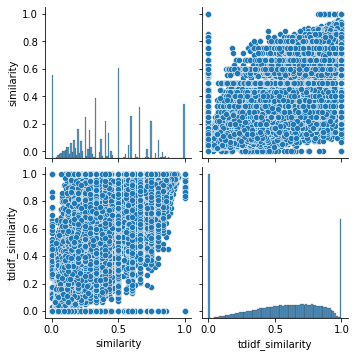

In [17]:
import seaborn as sns
sns.pairplot(data[['similarity','tdidf_similarity']])

In [18]:
filter1 = data['similarity']<0.95
filter2 = data['similarity']>0.05
filter3 = data['tdidf_similarity']<0.98
filter4 = data['tdidf_similarity']>0.05
data = data[filter1&filter2&filter3&filter4]

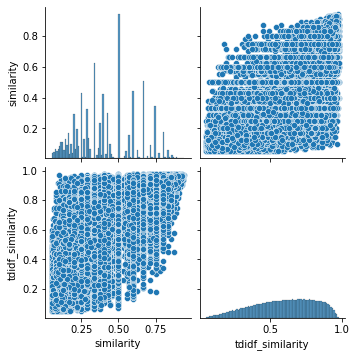

In [19]:
import seaborn as sns
sns.pairplot(data[['similarity','tdidf_similarity']])

In [20]:
from scipy.stats import boxcox
data['tdidf_similarity'] = 1.5*boxcox(data['tdidf_similarity'], 1.50)

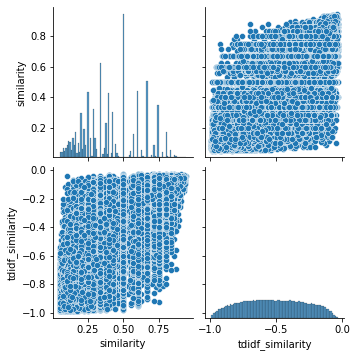

In [21]:
import seaborn as sns
sns.pairplot(data[['similarity','tdidf_similarity']])

We have done some outlier removal and transformation. The features are normal and non-correlated. However, as the similarity feature shows: the dataset seems not sampled frequently enough around the mean-point (or should we consider it two distribution? or modify the feature?)   

### Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

In [23]:
X = data[['similarity','tdidf_similarity']]
y = data[['is_duplicate']]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, f1_score, accuracy_score

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 65)

In [26]:
clf_lg = LogisticRegression()
clf_lg.fit(X_train,y_train)
training_score = clf_lg.score(X_train,y_train)
print('Training Accuracy =', training_score)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training Accuracy = 0.6112609959060825


Test Accuracy = 0.6143112907883338
F1 Score = 0.4256299991399329


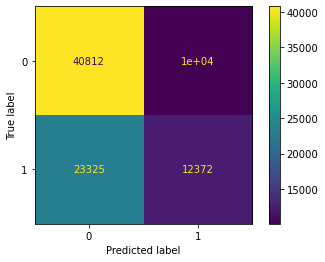

In [27]:
y_pred = clf_lg.predict(X_test)
test_score = clf_lg.score(X_test,y_test)
print('Test Accuracy =', test_score)
print('F1 Score =', f1_score(y_test, y_pred))
plot_confusion_matrix(clf_lg,X_test,y_test)


In [28]:
import xgboost as xgb
from xgboost import XGBClassifier

In [29]:
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)
training_score = clf_xgb.score(X_train,y_train)
print('Training Accuracy =', training_score)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[14:06:08] WARNING: /private/var/folders/wq/gqh6jtdn6v91783c3m6r4v2c0000gn/T/pip-install-7zychkfp/xgboost_8fd69629bc2d4777b10df5c543192839/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy = 0.6640264941313915


Test Accuracy = 0.651146404851285
F1 Score = 0.5904591435467686


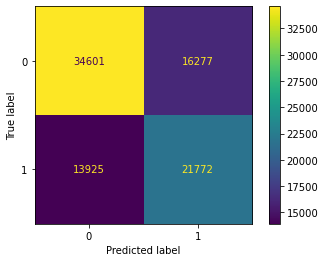

In [30]:
y_pred = clf_xgb.predict(X_test)
test_score = clf_xgb.score(X_test,y_test)
print('Test Accuracy =', test_score)
print('F1 Score =', f1_score(y_test, y_pred))
plot_confusion_matrix(clf_xgb,X_test,y_test)

### Optimizing the Classifier Model

In [34]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [35]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [36]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [39]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
#timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[14:42:01] WARNING: /private/var/folders/wq/gqh6jtdn6v91783c3m6r4v2c0000gn/T/pip-install-7zychkfp/xgboost_8fd69629bc2d4777b10df5c543192839/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:01] WARNING: /private/var/folders/wq/gqh6jtdn6v91783c3m6r4v2c0000gn/T/pip-install-7zychkfp/xgboost_8fd69629bc2d4777b10df5c543192839/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x17a421d60>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None, silent=True,
                                           subsample=None, tree_met

In [40]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([42.65257835, 43.77180568, 45.38369044, 44.86491497, 43.72468559]), 'std_fit_time': array([0.19253861, 0.49212959, 0.16674087, 0.04412979, 0.34248789]), 'mean_score_time': array([0.70967309, 1.70324548, 1.72193138, 1.52727596, 0.87909722]), 'std_score_time': array([0.02297954, 0.01042663, 0.01082975, 0.0603227 , 0.13905574]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
         

In [42]:
#results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
#results_df.to_csv('submission-random-grid-search-xgb-porto-01.csv', index=False)

Training Accuracy = 0.7162362616039344
Test Accuracy = 0.7148215617092978
F1 Score = 0.5981610964429289


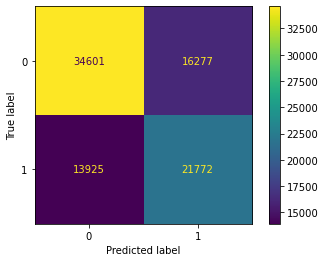

In [43]:
training_score = random_search.score(X_train,y_train)
print('Training Accuracy =', training_score)
y_pred = random_search.predict(X_test)
test_score = random_search.score(X_test,y_test)
print('Test Accuracy =', test_score)
print('F1 Score =', f1_score(y_test, y_pred))
plot_confusion_matrix(clf_xgb,X_test,y_test)